In [145]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

cleansed_path = './cleansed_data/'
raw_path = 'raw_data.json'
with open(raw_path, 'r') as f:
    raw_data = json.load(f)

In [146]:
# Open cleansed_data files. They are seperated as 'cleansed_data_cot_0_100.json', 'cleansed_data_cot_100_200.json', ...

cleansed_data = []

for i in range(0, 56300, 100):
    with open(cleansed_path + 'cleansed_data_cot_' + str(i) + '_' + str(i+100) + '.json', 'r') as f:
        cleansed_data.extend(json.load(f))

In [147]:
# with open('./cleansed_data.json', 'w') as f:
#     json.dump(cleansed_data, f, indent=4, ensure_ascii=False)

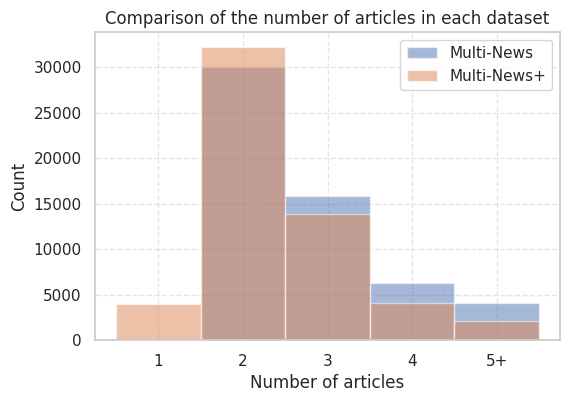

136682 153091


In [148]:
# Read the "document_num" in cleansed_data and raw_data and compare them by drawing a histogram.

cleansed_document_num = [int(data['document_num']) for data in cleansed_data]
raw_document_num = [int(data['document_num']) for data in raw_data]

# Gather document_num >=5 to one group
# Change the "5" to "5+" in the x-axis
# cleansed_document_num = [str(num) if num < 5 else '5+' for num in cleansed_document_num]
# raw_document_num = [str(num) if num < 5 else '5+' for num in raw_document_num]

cleansed_document_num = [num if num < 5 else 5 for num in cleansed_document_num]
raw_document_num = [num if num < 5 else 5 for num in raw_document_num]

# Sort the x-axis
cleansed_document_num.sort()
raw_document_num.sort()

plt.figure(figsize=(6, 4))

plt.hist(raw_document_num, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], alpha=0.5, label='Multi-News', align='mid')
plt.hist(cleansed_document_num, bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], alpha=0.5, label='Multi-News+', align='mid')


# Correcting the x-ticks. We need 6 locations for the 5 labels and the '5+' label.
plt.xticks([1, 2, 3, 4, 5], ['1', '2', '3', '4', '5+'])

# Gray dotted line background
plt.grid(True, linestyle='--', alpha=0.5)

plt.title('Comparison of the number of articles in each dataset')
plt.xlabel('Number of articles')
plt.ylabel('Count')
plt.legend()
plt.show()

print(sum(cleansed_document_num), sum(raw_document_num))